# 项目简介
掌握python批量读取nc文件的方法

# 配套视频链接：
批量读取文本文件&表格&栅格文件
批量读取多个子文件夹下的文件
https://www.bilibili.com/video/BV15a411P751

# 友情链接（上期视频，有除了批量读取数据外的其他部分的详细解析）：
《气象科研绘图8：使用ECWMF数据绘制2m气温空间分布图》
和鲸社区代码&图文教程：https://www.heywhale.com/mw/project/62f1fda66864f1167ed8f031
配套视频：https://www.bilibili.com/video/BV1nd4y1m7WW

## 1.导入需要的库&函数

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter

C:\ProgramData\Anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


## 2.指定文件路径，实现批量读取满足条件的文件
提示：可以通过更改filepath.glob()中的参数实现批量读取多个子文件夹下的文件（课件pdf第16页，也可以看配套b站教学视频）

In [2]:
filepath = Path('D:/bllibili/Python绘图技巧3')
filelist = list(filepath.glob('*.nc'))

print(filelist)

[WindowsPath('D:/bllibili/Python绘图技巧3/air2m20210901.nc'), WindowsPath('D:/bllibili/Python绘图技巧3/air2m20210902.nc'), WindowsPath('D:/bllibili/Python绘图技巧3/air2m20210903.nc'), WindowsPath('D:/bllibili/Python绘图技巧3/air2m20210904.nc'), WindowsPath('D:/bllibili/Python绘图技巧3/air2m20210905.nc')]


## 3.读取其中一个文件的经纬度数据，制作经纬度网格（这样就不需要重复读取）

In [3]:
#随便读取一个文件（一般默认需要循环读取的文件格式一致）
f1 = xr.open_dataset(filelist[1])
#print(f1)

#提取经纬度（这样就不需要重复读取）
lat = f1['latitude'].data
lon = f1['longitude'].data

#画图网格
X,Y = np.meshgrid(lon,lat)

C:\ProgramData\Anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


## 4.for循环读取文件+数据处理

In [4]:
#for循环
t2m_all = []
for file in filelist:
    with xr.open_dataset(file) as f:
        t2m = f['t2m'].data
        t2m_day = np.mean(t2m,axis=0)  #对时间维度作平均（1天0-23小时每小时→1天平均）
        t2m_all.append(t2m_day)

#对时间维度作平均（5天每天的→5天平均）
t2m_mean = np.mean(t2m_all,axis=0)

#开尔文温度转换成摄氏温度
t2m_mean = t2m_mean-273.15

## 5.画图

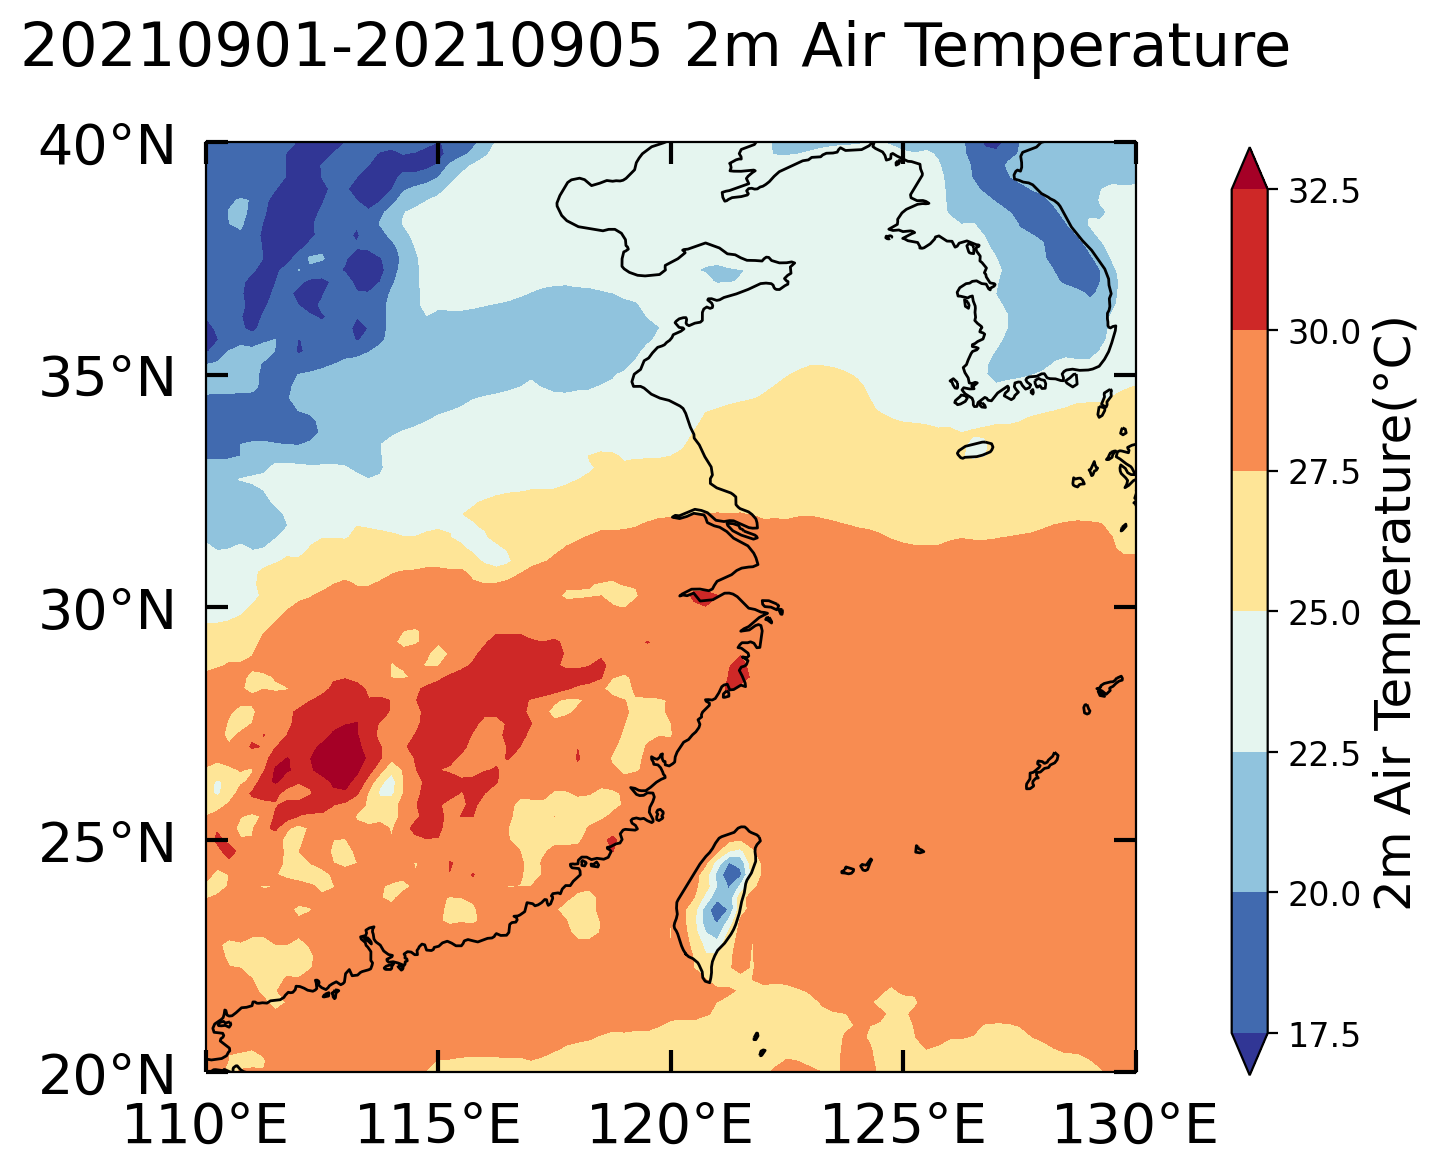

In [5]:
#figure和ax设置
fig = plt.figure(figsize=(6,8),dpi=200)
proj = ccrs.PlateCarree()
region=[110,130,20,40]
ax = plt.axes(projection=proj)
ax.set_extent(region,crs = proj)  #设置区域与需要画图的区域范围一致
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))  #海岸线

#contourf等高线填色图
con1 = ax.contourf(X,Y,t2m_mean,cmap='RdYlBu_r',extend='both')  #色卡反向

#刻度设置
ax.set_xticks([110,115,120,125,130])  #指定要显示的经纬度
ax.set_yticks([20,25,30,35,40])
ax.xaxis.set_major_formatter(LongitudeFormatter())  #刻度格式转换为经纬度样式
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.tick_params(axis='x',top=True,which='major',direction='in',length=8,width=1.5,labelsize=20,pad=10)  #刻度样式
ax.tick_params(axis='y',right=True,which='major',direction='in',length=8,width=1.5,labelsize=20,pad=10)

#colorbar颜色条
l,b,w,h = 0.98, 0.21, 0.03, 0.58
rect = [l,b,w,h]
cbar_ax = fig.add_axes(rect)
cb = fig.colorbar(con1, cax = cbar_ax,orientation='vertical',spacing='proportional')
cb.set_label('2m Air Temperature(°C)',fontsize=18)
cb.ax.tick_params(labelsize=12)

#标题
plt.suptitle('20210901-20210905 2m Air Temperature',fontsize=22,y=0.87)
plt.savefig('C:/Users/LULU/Desktop/t_mean.jpg',bbox_inches = 'tight')  #完整保存图片
plt.show()